<a href="https://colab.research.google.com/github/apurupa04/classification-of-iris/blob/iris-classification/iris_classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=2bffccaadd315d8f9bfa2d220919bed9a9a70c8fa2cd70002c6c73b5bea308e7
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Load Data and review content
iris_data = pd.read_csv("iris_flowers.csv")

print("\nLoaded Data :\n------------------------------------")
print(iris_data.head())

#Use a Label encoder to convert String to numeric values 
#for the target variable

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_data['class'] = label_encoder.fit_transform(
                                iris_data['class'])

#Convert input to numpy array
np_iris = iris_data.to_numpy()

#Separate feature and target variables
X_data = np_iris[:,0:4]
Y_data=np_iris[:,4]

print("\nFeatures before scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget before scaling :\n------------------------------------")
print(Y_data[:5])

#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

#Scale the numeric feature variables
X_data = scaler.transform(X_data)

#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)

print("\nFeatures after scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y_data[:5,:])

#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Loaded Data :
------------------------------------
   sepal_length  sepal_width  petal_length   petal_width        class
0           5.1          3.5           1.4           0.2  iris_setosa
1           4.9          3.0           1.4           0.2  iris_setosa
2           4.7          3.2           1.3           0.2  iris_setosa
3           4.6          3.1           1.5           0.2  iris_setosa
4           5.0          3.6           1.4           0.2  iris_setosa

Features before scaling :
------------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling :
------------------------------------
[0. 0. 0. 0. 0.]

Features after scaling :
------------------------------------
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346

In [ ]:
from tensorflow import keras

#Number of classes in the target variable
NB_CLASSES=3

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(4,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________



Training Progress:
------------------------------------
Epoch 1/10
7/7 [==============================] - 1s 42ms/step - loss: 0.8096 - accuracy: 0.7685 - val_loss: 0.7344 - val_accuracy: 0.6667
Epoch 2/10
7/7 [==============================] - 0s 9ms/step - loss: 0.5112 - accuracy: 0.8611 - val_loss: 0.6130 - val_accuracy: 0.7037
Epoch 3/10
7/7 [==============================] - 0s 9ms/step - loss: 0.4097 - accuracy: 0.8704 - val_loss: 0.5443 - val_accuracy: 0.7037
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 0.3510 - accuracy: 0.8704 - val_loss: 0.4910 - val_accuracy: 0.7037
Epoch 5/10
7/7 [==============================] - 0s 9ms/step - loss: 0.3108 - accuracy: 0.8889 - val_loss: 0.4603 - val_accuracy: 0.7037
Epoch 6/10
7/7 [==============================] - 0s 12ms/step - loss: 0.2828 - accuracy: 0.8704 - val_loss: 0.4231 - val_accuracy: 0.7407
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2516 - accuracy: 0.8981 - val_loss: 0.38

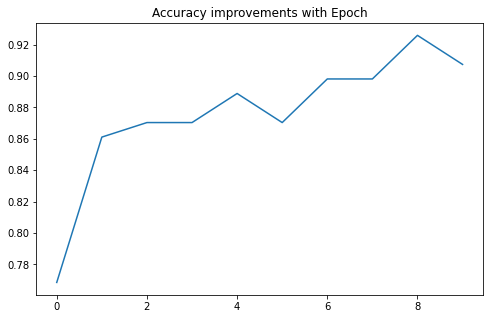


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 29ms/step - loss: 0.2918 - accuracy: 0.9333


[0.29184839129447937, 0.9333333373069763]

In [ ]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

In [ ]:
#Saving a model
    
model.save("iris_save")
    
#Loading a Model 
loaded_model = keras.models.load_model("iris_save")

#Print Model Summary
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 108ms/step
Raw Prediction Output (Probabilities) : [[0.0293346  0.54764265 0.42302275]]
Prediction is  ['iris_versicolor']
